# Heart Attack Analysis

**Objective**  

To predict the likelihood of a heart attack based on various medical attributes and risk factors.

**Motivation**  

Heart disease is a leading cause of death globally. Early detection and intervention can significantly reduce mortality rates. Predictive models can assist healthcare professionals in identifying individuals at higher risk, allowing for proactive measures such as lifestyle modifications or medical treatments.

**Method**  


Utilize machine learning algorithms to analyze a dataset containing demographic information, medical history, and physiological measurements of individuals. Train the model to predict the likelihood of a heart attack based on the provided features. Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, and F1-score.



### Import Packages

In [77]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# import modals
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# preporccessing
from sklearn.preprocessing import LabelEncoder,StandardScaler

# model selection 
from sklearn.model_selection import train_test_split,cross_val_score

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


import warnings
warnings.filterwarnings('ignore')

## Get Data  

Dataset source: [Kaggle](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data)

**Dataset Description**   


* Age: Age GroupGroupGroupof the patient.
* Sex: Sex of the patient (0 = female, 1 = male).
* exang: Exercise-induced angina (1 = yes, 0 = no).
* ca: Number of major vessels (0-3).
* cp: Chest pain type:
    * Value 1: Typical angina
    * Value 2: Atypical angina
    * Value 3: Non-anginal pain
    * Value 4: Asymptomatic
* trtbps: Resting blood pressure (in mm Hg).
* chol: Cholesterol level in mg/dl fetched via BMI sensor.
* fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).
* rest_ecg: Resting electrocardiographic results:
    * Value 0: Normal
    * Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
* Tallium stress result:
    * Value 0: Normal
    * Value 1: Fixed defect
    * Value 2: Reversible defect
* target: Likelihood of heart attack:
    * 0: Less chance of heart attack
    * 1: More chance of heart attack

In [78]:
import pandas as pd
import numpy as np

# Load the original dataset
df = pd.read_csv("data/heart.csv")
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Preparing Data  

In this section of code, a DataFrame (df) containing data related to heart disease is being processed. Here's an overview of what is being done:

* Column Renaming: The columns of the DataFrame are being renamed using the rename() method. Each column is being assigned a new name according to its content or abbreviation for better readability and understanding. 
Printing Data Information: After renaming the columns, the code prints information about the DataFrame using the info() method. This provides an overview of the DataFrame structure including column names, data types, and non-null counts.

* Checking for Missing Values: The code then checks for missing values in the DataFrame using the isnull().sum() method. This counts the number of missing values in each column and helps in identifying if there are any missing values that need to be handled.

* Descriptive Statistics: Finally, the code calculates and prints descriptive statistics for the DataFrame using the describe() method. This provides statistical summary such as count, mean, standard deviation, minimum, maximum, and quartile values for each numerical column in the DataFrame.

In [79]:
# Rename Columns
df.rename(columns={
    "age":"Age",
    "sex":"Sex",
    "cp":"ChestPain",
    "trtbps":"RestingBloodPressure",
    "chol":"Cholesterol",
    "fbs":"FastingBloodSugar",
    "restecg":"RestingECG",
    "thalachh":"MaxHeartRate",
    "exng":"ExcerciseAngina",
    "oldpeak":"OldPeak",
    "slp":"STSlope",
    "caa":"nMajorVessels",
    "thall":"Thalium",
    "output":"Status"
}, inplace=True)

# Data info
print('Info on the data columns: ')
print(df.info())

Info on the data columns: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   303 non-null    int64  
 1   Sex                   303 non-null    int64  
 2   ChestPain             303 non-null    int64  
 3   RestingBloodPressure  303 non-null    int64  
 4   Cholesterol           303 non-null    int64  
 5   FastingBloodSugar     303 non-null    int64  
 6   RestingECG            303 non-null    int64  
 7   MaxHeartRate          303 non-null    int64  
 8   ExcerciseAngina       303 non-null    int64  
 9   OldPeak               303 non-null    float64
 10  STSlope               303 non-null    int64  
 11  nMajorVessels         303 non-null    int64  
 12  Thalium               303 non-null    int64  
 13  Status                303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


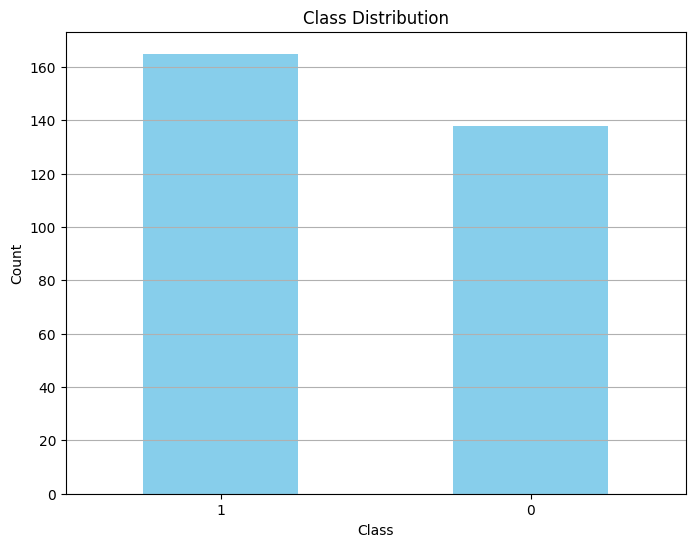

In [80]:
import matplotlib.pyplot as plt

# Assuming 'y' contains the target variable
y = df['Status']
X = df.drop('Status', axis=1)
# Calculate the count of each class
class_counts = y.value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

- The frequency distribution of two classes—labeled "1" and "0"—within a certain dataset is shown in the graphic. Class "0" has a count close to 140, and class "1" has a count slightly over 160, indicating a lesser frequency. This suggests that instances classified as class "1" are more prevalent than those classified as class "0" within the dataset.   
- Based on the particular count differential, class "1" is roughly 33% more common than class "0". This type of distribution raises the possibility that the dataset contains an inherent imbalance, which could affect the results of analyses, particularly when it comes to tasks involving classification or predictive modelling.

In [81]:
class_counts = df['Status'].value_counts()
print(class_counts)

Status
1    165
0    138
Name: count, dtype: int64


Considering a less prominent class imbalance present in the dataset. We need to try out which metholdology proves to be more beneficial for us. 

In a medical context, especially for predicting heart attacks, the importance of accurately identifying positive cases ("detected") often outweighs the importance of identifying negative ones ("not detected"), primarily because missing a positive case (false negative) can have serious consequences. 

In [82]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Status')], axis=1)

# Now 'df_resampled' contains the resampled data
df = df_resampled

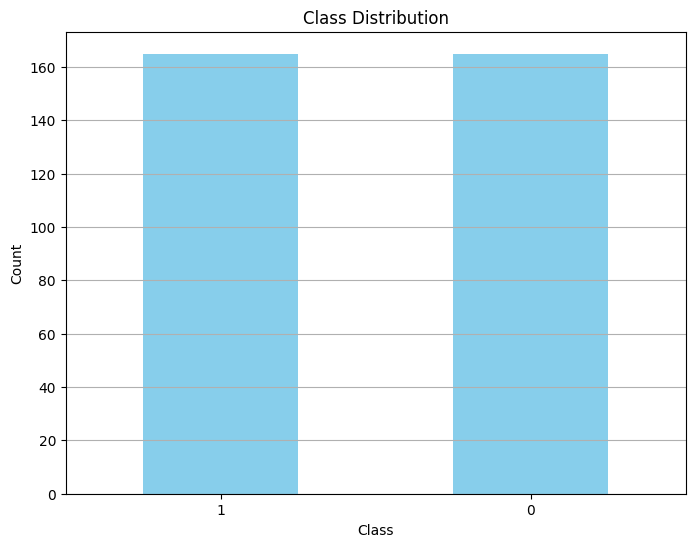

In [83]:
import matplotlib.pyplot as plt

# Assuming 'y' contains the target variable
y = df['Status']
# Calculate the count of each class
class_counts = y.value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [84]:
df.isnull().sum()

Age                     0
Sex                     0
ChestPain               0
RestingBloodPressure    0
Cholesterol             0
FastingBloodSugar       0
RestingECG              0
MaxHeartRate            0
ExcerciseAngina         0
OldPeak                 0
STSlope                 0
nMajorVessels           0
Thalium                 0
Status                  0
dtype: int64

In [85]:
df.describe()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,54.445455,0.693939,0.927273,131.654545,246.990909,0.157576,0.506061,148.469697,0.351515,1.072121,1.393939,0.784848,2.306061,0.500000
std,9.008527,0.461555,1.040596,17.623263,51.990500,0.364896,0.524442,22.991488,0.478168,1.168434,0.615869,1.042740,0.628811,0.500759
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,0.500000,130.000000,243.000000,0.000000,0.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.500000
75%,61.000000,1.000000,2.000000,140.000000,280.250000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Outlier Detection

This section of code is focused on detecting and handling outliers in numerical columns of the DataFrame.
* Numerical Columns Selection: The code defines a list named numerical_columns containing the names of the numerical columns in the DataFrame.

* Boxplot Visualization: Using Seaborn's boxplot() function, boxplots are created for each numerical column. These visualizations offer insights into the distribution of values within each column, aiding in outlier detection.

* Outlier Detection and Clipping: For each numerical column, z-scores are computed to identify outliers. Data points with absolute z-scores exceeding a predetermined threshold (set at 3) are considered outliers. These outliers are then clipped by replacing them with the nearest non-outlier value within the range of the data.

* Verification: After outlier clipping, the describe() method is employed to generate descriptive statistics for the DataFrame. This step verifies the efficacy of the outlier-handling process.

* Re-Visualization: Boxplots are once again created for each numerical column to visually assess the distribution of values post-outlier clipping. This step confirms whether the outlier handling procedure was successful and provides insights into the revised data distribution.

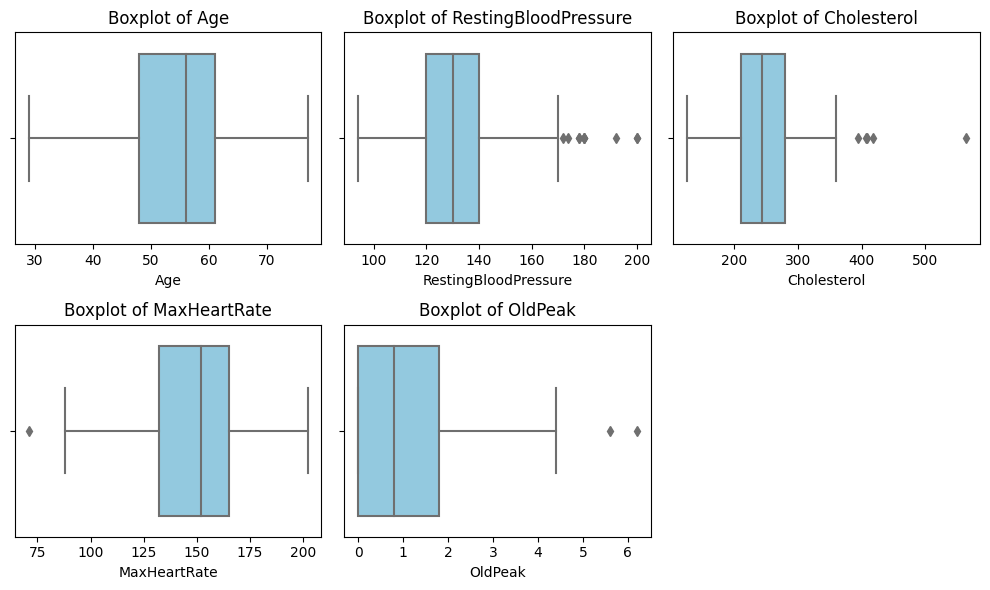

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']

# Create boxplots for each numerical column
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

### Boxplot of Age:
- The age distribution is fairly symmetrical around the median.   
- The interquartile range (IQR) is the range of a person's age from around the early 50s to roughly 60.   
- Since there are no obvious outliers, all of the values in this dataset fall within a respectable range.   
<br><br>
### Boxplot of RestingBloodPressure:
- The median blood pressure at rest is in the 130s.   
- In comparison to age, there is a greater range of readings, and a few outliers show those with unusually high resting blood pressure.   
<br><br>
### Boxplot of Cholesterol:
- The median cholesterol level is in the mid-200s.   
- The spread is rather large, indicating a large individual variance in cholesterol levels.   
- On the higher end, there are a few outliers that show some people have extremely high cholesterol.   
<br><br>
### Boxplot of MaxHeartRate:
- The median maximum heart rate appears to be around 150 beats per minute.   
- The spread is rather large, indicating a large individual variance in cholesterol levels.   
- On the higher end, there are a few outliers that show some people have extremely high cholesterol.   
<br><br>
### Boxplot of OldPeak:
- This measure has a median close to 1, with a notable number of outliers.
- Although the IQR is narrow, a few people appear to have substantially higher OldPeak values, as evidenced by the lengthy tail to the right that contains multiple outliers.      
<br><br>

In [87]:
# Define the clipping thresholds for each numerical column
threshold = 3 

# Apply clipping to each numerical column
for col in numerical_columns:
    # Calculate the z-scores for each numerical column
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    # Identify outliers based on z-scores
    outliers = np.abs(z_scores) > threshold
    # Clip outliers by replacing them with the nearest non-outlier value
    df[col] = df[col].clip(lower=df[col][~outliers].min(), upper=df[col][~outliers].max())

# Verify the changes
print(df.describe())

              Age         Sex   ChestPain  RestingBloodPressure  Cholesterol   
count  330.000000  330.000000  330.000000            330.000000   330.000000  \
mean    54.445455    0.693939    0.927273            131.496970   246.321212   
std      9.008527    0.461555    1.040596             17.099787    49.136679   
min     29.000000    0.000000    0.000000             94.000000   126.000000   
25%     48.000000    0.000000    0.000000            120.000000   211.000000   
50%     56.000000    1.000000    0.500000            130.000000   243.000000   
75%     61.000000    1.000000    2.000000            140.000000   280.250000   
max     77.000000    1.000000    3.000000            180.000000   394.000000   

       FastingBloodSugar  RestingECG  MaxHeartRate  ExcerciseAngina   
count         330.000000  330.000000    330.000000       330.000000  \
mean            0.157576    0.506061    148.521212         0.351515   
std             0.364896    0.524442     22.835899         0.47816

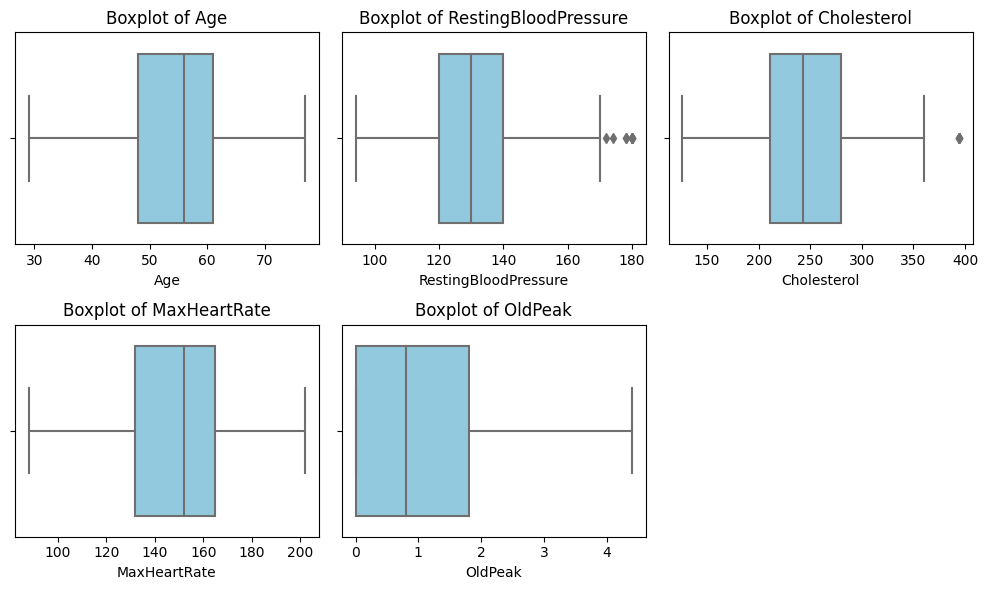

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']

# Create boxplots for each numerical column
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

### Boxplot of Age:
- The median age is in the mid-50s, and age statistics are concentrated in the middle of the range.   
- The range of ages falls between about 30 and 70 years old, and the age distribution seems to be generally symmetrical.   
- The absence of anomalies suggests that the age distribution of the population sample is normal.    
<br><br>
### Boxplot of RestingBloodPressure:
- The median resting blood pressure is slightly above 120 mmHg.   
- In comparison to age, the data points are more dispersed, and a few outliers show cases of abnormally high blood pressure.        
<br><br>
### Boxplot of Cholesterol:
- The median cholesterol level seems to be around 250 mg/dL.      
- The data covers a wide range from about 150 to 350 mg/dL, with a few extreme examples at the top.    
<br><br>
### Boxplot of MaxHeartRate:
- With a range mostly between 100 and 200 beats per minute, the median maximal heart rate is roughly 150 beats per minute.   
- There are no notable outliers in the distribution, which is somewhat skewed towards lower values.     
<br><br>
### Boxplot of OldPeak:
- The exercise-induced ST depression, or median OldPeak, is mild, hovering around 1.0.   
- Outliers are present, suggesting that a small percentage of people have significantly greater OldPeak values than the general population.         
<br><br>

## Exploratory Data Analysis (EDA)

## Frequency Distribution of Age GroupGroupGroupin the Dataset

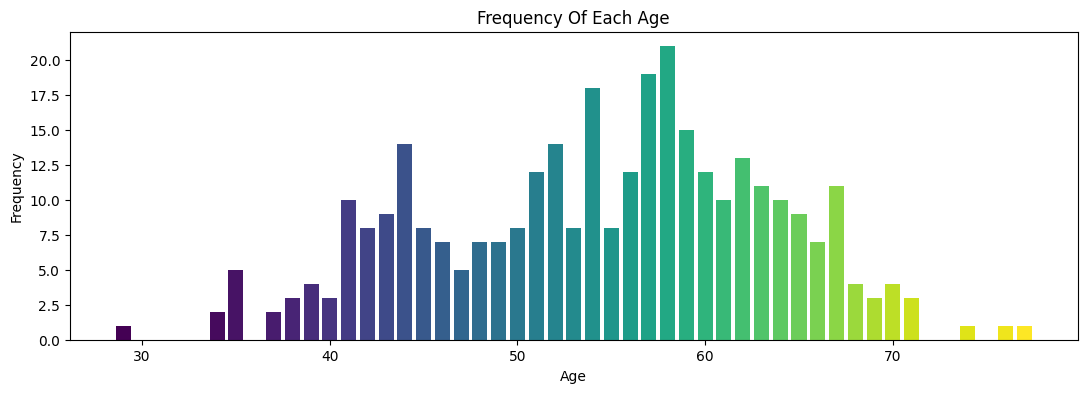

In [89]:
plt.figure(figsize=(13,4))
age_counts = df['Age'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts.values, color=plt.cm.viridis(np.linspace(0, 1, len(age_counts))))
plt.title('Frequency Of Each Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram provided appears to show the distribution of frequency across different age groups:

- The age data is skewed to the right, indicating that there are more younger individuals than older ones in the dataset.
  
- The most frequent age group in this data appears to be in the mid-50s, where the highest peak is observed.
  
- The frequency steadily increases from the 30s to the 50s and then starts to decrease gradually after the mid-50s, dropping more sharply after 60.
  
- There are very few individuals in the dataset who are in their 70s, as indicated by the low frequency bars at the far right of the histogram.

This kind of distribution might suggest that the dataset could be representative of a scenario where middle-aged individuals are more prevalent or more likely to be sampled, such as a professional workplace setting. It could also reflect a population pyramid of a developed country where middle-aged individuals make up a large proportion of the population, or it could be related to a specific study or survey targeting a certain age demographic with fewer older participants.

## Resting Blood Pressure Trends Across Age GroupGroupGroupand Sex

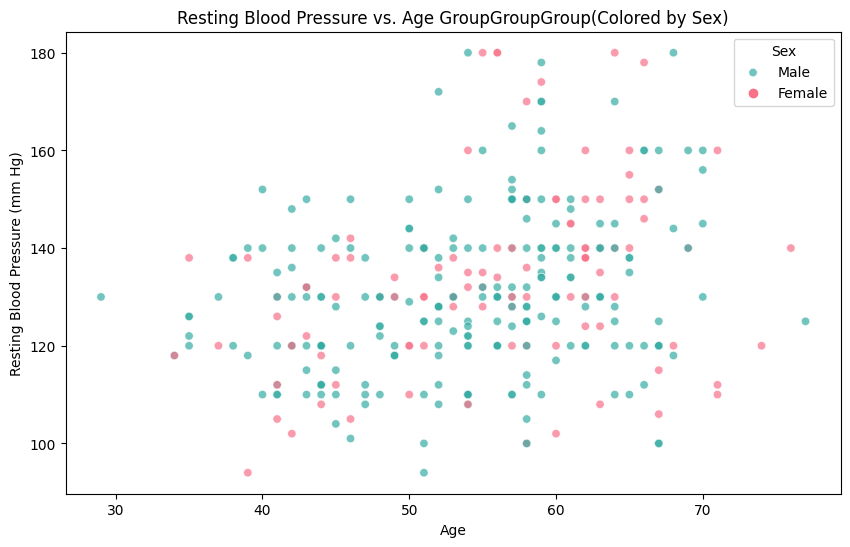

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='RestingBloodPressure', hue='Sex', palette='husl', alpha=0.7)
plt.title('Resting Blood Pressure vs. Age GroupGroupGroup(Colored by Sex)')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.legend(title='Sex', labels=['Male', 'Female'], loc='upper right')
plt.show()

- The distribution of data points does not indicate a clear linear relationship between age and resting blood pressure across the age groups shown. 

- Both males and females are scattered throughout the blood pressure range, without a distinct pattern that separates the sexes. 

- There appears to be a slight increase in the density of higher blood pressure readings with age, as we can see some of the highest blood pressure readings occurring in the 60-70 age group.

- The blood pressure readings span a broad range, with most data points falling between approximately 120 mm Hg and 140 mm Hg regardless of age or sex. 

- It is worth noting that there are outliers, particularly in the higher blood pressure range, that are spread across different ages. 

- While both sexes exhibit similar variations in blood pressure, without further statistical analysis, it's difficult to ascertain any sex-specific trends or significant differences.

The plot suggests variability in resting blood pressure among individuals that is not strictly explained by age or sex based on this dataset. For more precise conclusions, further statistical analysis would be required, possibly controlling for additional factors or using more sophisticated modeling to determine if there are underlying trends or patterns.   

## Chest pain type (cp) across different Age GroupGroupGroupgroups

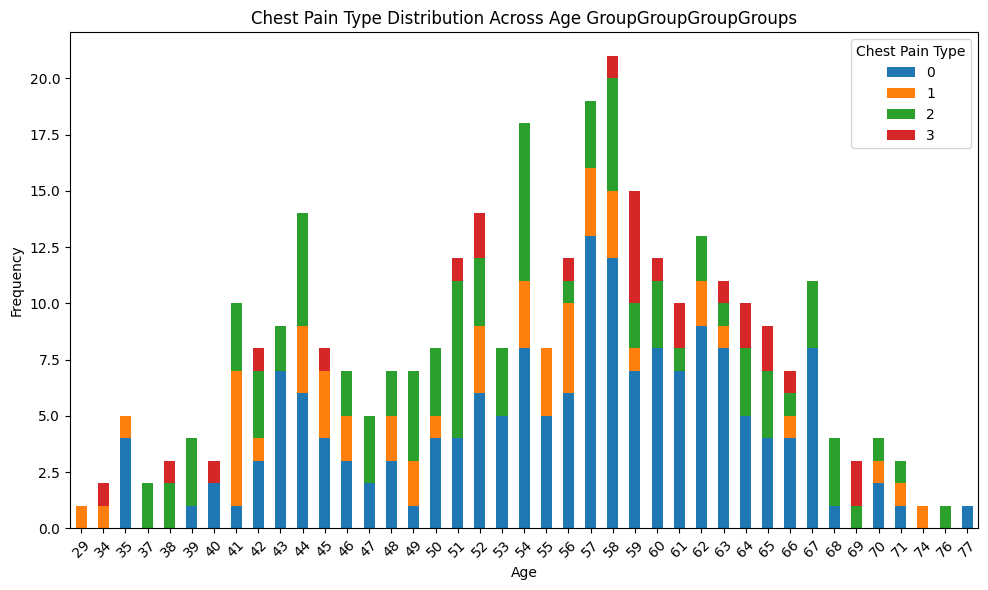

In [91]:
# Define Age GroupGroupGroupgroups
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Add Age  column
df['Age '] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by Age and Chest Pain Type (cp), and count occurrences
cp_age_group = df.groupby(['Age', 'ChestPain']).size().unstack(fill_value=0)

# Plot
cp_age_group.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Chest Pain Type Distribution Across Age GroupGroupGroupGroups')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Chest Pain Type', loc='upper right')
plt.tight_layout()
plt.show()

The bar chart depicts the distribution of different types of chest pain across various age groups:

- The types of chest pain are categorized numerically from 0 to 3. These categories could correspond to different clinical definitions or severities of chest pain.

- Type 2 chest pain appears to be the most frequent across most age groups, especially prominent in the 50-60 age range.

- Type 0, which could represent a baseline or less severe type of pain, is present across all age groups but is less frequent than Type 2.

- Type 1 and Type 3 chest pains are less common overall, with Type 1 appearing more frequently in younger age groups (30s to 50s) and Type 3 being more frequent in older age groups (50s to 70s).

- The frequency of all chest pain types tends to decrease in the oldest age groups (70 and above).

- There is a noticeable peak for Type 2 chest pain in the late 50s, which could suggest a prevalence of a specific medical condition or a higher susceptibility to this type of chest pain in that age group.

This data could be valuable for medical practitioners or health services planning as it may indicate which age groups are more susceptible to certain types of chest pain, potentially aiding in diagnosis or preventative care strategies. It's important to note that the actual clinical implications would depend on the specific clinical definitions of the chest pain types labeled 0 to 3.   

## Distribution of Maximum Heart Rate

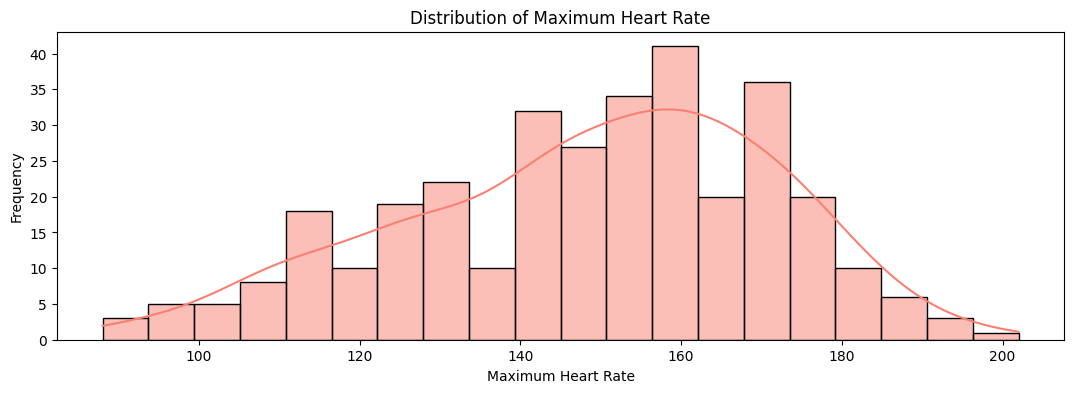

In [92]:
plt.figure(figsize=(13,4))
sns.histplot(df['MaxHeartRate'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Maximum Heart Rate')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')
plt.show()

- The most common maximum heart rate values fall within the 140 to 160 beats per minute (bpm) range, which is where the histogram peaks.

- The distribution is approximately bell-shaped, suggesting a normal distribution, with fewer individuals having very low or very high maximum heart rate values.

- There are some individuals with maximum heart rates above 180 bpm and as low as below 100 bpm, but these are relatively rare.

- The normal distribution curve fitted over the histogram suggests that the population’s maximum heart rate is centered around the 140-160 bpm range, which is generally considered a normal range for maximum heart rate during intense exercise, depending on age and fitness level.

This distribution might be used to understand the cardiovascular health of a group, or it could be indicative of the fitness levels of the individuals from whom the data was collected. In a clinical or fitness context, such a distribution might help in setting target heart rate zones for exercise or identifying outliers who may require further medical evaluation.

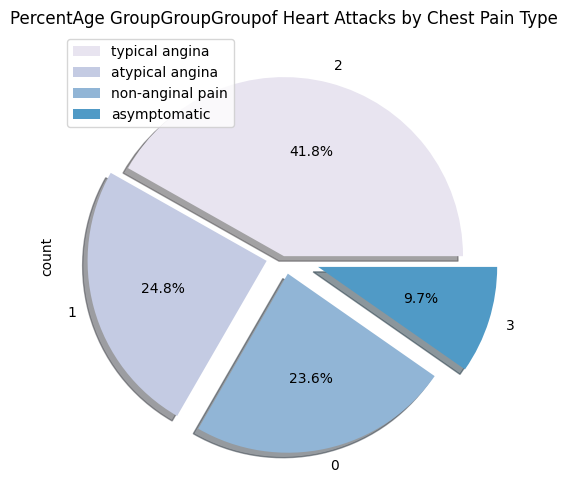

In [93]:

# Create a figure and axes
plt.figure(figsize=(15, 5))

# Filter data for heart attacks
heart_attack_data = df[df["Status"] == 1]
chest_pain_counts = heart_attack_data["ChestPain"].value_counts()
explode = [0, 0.1, 0.1, 0.2]
colors = sns.color_palette("PuBu")
chest_pain_counts.plot(kind='pie', autopct='%0.1f%%', explode=explode, shadow=True, colors=colors)
chest_pain_replacement_dic = {0: "typical angina", 1: "atypical angina", 2: "non-anginal pain", 3: "asymptomatic"}

plt.legend(labels=chest_pain_replacement_dic.values(), loc="upper left")
plt.title("PercentAge GroupGroupGroupof Heart Attacks by Chest Pain Type")
plt.tight_layout()
plt.show()

The pie chart represents the proportion of heart attacks categorized by different types of chest pain:

- "Typical angina" is the most common type of chest pain associated with heart attacks, making up 41.8% of the cases. Typical angina is generally characterized by chest discomfort that occurs with exertion or stress and is relieved by rest or nitroglycerin.

- "Non-anginal pain" and "atypical angina" represent a significant portion as well, accounting for 24.8% and 23.6% of the cases, respectively. Atypical angina can include chest pain that is not typical of angina, whereas non-anginal pain might not be related to the heart directly.

- "Asymptomatic" cases, where individuals did not experience any symptoms, account for 9.7% of the cases. This suggests that a notable percentage of heart attacks may occur without the classic symptoms of chest pain or discomfort.

The percentages provided give insights into the symptoms experienced during heart attacks, emphasizing the importance of recognizing both typical and atypical presentations of heart conditions. The presence of asymptomatic cases underscores the fact that heart attacks can occur without any chest pain and may be detected incidentally or through routine screening. This distribution can be essential for educating the public and healthcare professionals to consider a wider range of symptoms when diagnosing and treating heart attacks. 

In [94]:
df.head(10)

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status,Age
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-69
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30-39
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-49
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,50-59
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,50-59
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,50-59
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,50-59
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,40-49
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,50-59
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,50-59


### Data Encoding  

Here, in this data set data encoding is only required for the Age GroupGroupGroupgroup.

In [95]:
for col in df.columns:
    df[col]=LabelEncoder().fit_transform(df[col])
df.head()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status,Age
0,29,1,3,31,64,1,0,48,0,22,0,0,1,1,4
1,3,1,2,22,80,0,1,83,0,32,0,0,2,1,1
2,7,0,1,22,35,0,0,70,0,14,2,0,2,1,2
3,22,1,1,14,67,0,1,75,0,8,2,0,2,1,3
4,23,0,0,14,145,0,1,61,1,6,2,0,2,1,3


In [96]:
df = df.drop("Age",axis=1)

### Data Splitting


In [97]:
X=df.drop("Status",axis=1)
y=df['Status']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

y_train.shape, y_test.shape

((264,), (66,))

In [98]:
X

,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Age
0,1,3,31,64,1,0,48,0,22,0,0,1,4
1,1,2,22,80,0,1,83,0,32,0,0,2,1
2,0,1,22,35,0,0,70,0,14,2,0,2,2
3,1,1,14,67,0,1,75,0,8,2,0,2,3
4,0,0,14,145,0,1,61,1,6,2,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1,0,1,119,0,0,24,1,9,1,2,2,4
326,0,0,31,126,0,0,44,1,10,1,0,3,4
327,0,0,46,112,1,0,32,1,35,0,2,3,3
328,1,0,34,104,0,0,12,1,6,1,1,1,3


### Standardize features

In [99]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

Training Logistic Regression...
Logistic Regression Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.77      0.84      0.81        32
           1       0.84      0.76      0.80        34

    accuracy                           0.80        66
   macro avg       0.81      0.80      0.80        66
weighted avg       0.81      0.80      0.80        66

Training Decision Tree...
Decision Tree Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.78      0.82      0.80        34

    accuracy                           0.79        66
   macro avg       0.79      0.79      0.79        66
weighted avg       0.79      0.79      0.79        66

Training Random Forest...
Random Forest Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.86      0.88      0.87        34

    a

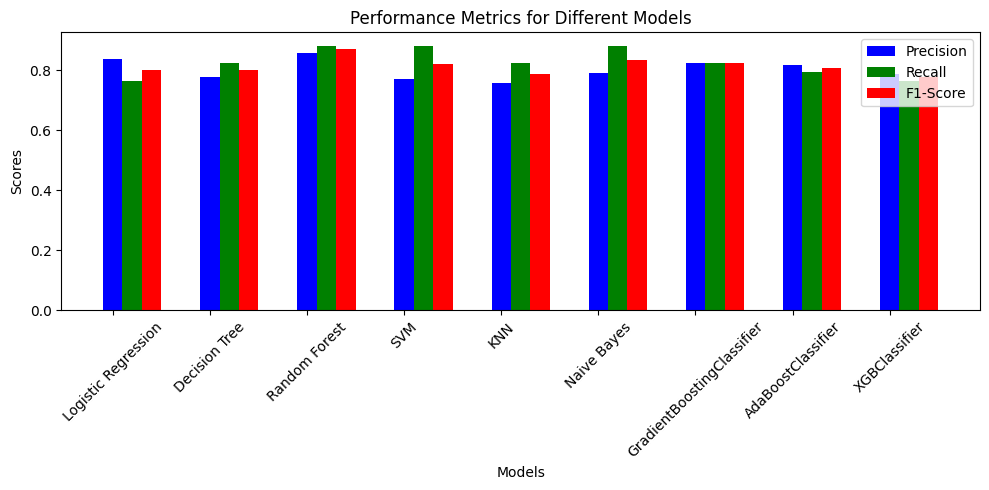

In [100]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import joblib

# Initialize an empty dictionary to store classification reports
classification_reports = {}

# Step 5: Model Building
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'XGBClassifier': xgb.XGBClassifier()     
}

best_model = None
best_model_name = None
best_f1_score = 0.0  # Initialize with a low value

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[name] = report
    
    # Check if current model has a better F1-score
    if report['1']['f1-score'] > best_f1_score:
        best_model = model
        best_model_name = name
        best_f1_score = report['1']['f1-score']

# Save the best model
if best_model:
    joblib.dump(best_model, 'best_model_pro.pkl')
    print(f"Best model {best_model_name} saved successfully!")

# Plotting the graph
precision = [report['1']['precision'] for report in classification_reports.values()]
recall = [report['1']['recall'] for report in classification_reports.values()]
f1_score = [report['1']['f1-score'] for report in classification_reports.values()]

plt.figure(figsize=(10, 5))

plt.bar(range(len(models)), precision, color='b', width=0.2, align='center', label='Precision')
plt.bar([i + 0.2 for i in range(len(models))], recall, color='g', width=0.2, align='center', label='Recall')
plt.bar([i + 0.4 for i in range(len(models))], f1_score, color='r', width=0.2, align='center', label='F1-Score')

plt.xticks(range(len(models)), list(models.keys()), rotation=45)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics for Different Models')
plt.legend()

plt.tight_layout()
plt.show()


It seems like there's a mix-up in the analysis of the models based on the performance metrics provided. Here’s a more accurate breakdown of each model’s performance, emphasizing which might be the best based on the results:

1. **Random Forest**: It has the highest accuracy (0.83) among all the models tested. It also shows strong performance across precision, recall, and F1-score for both classes. This makes it a robust model, especially for balanced performance across different evaluation metrics.

2. **Naive Bayes and GradientBoostingClassifier**: Both models have an accuracy of 0.82 and show very good precision, recall, and F1-scores. These models are slightly less accurate than the Random Forest but still provide strong results.

3. **SVM, Logistic Regression, and AdaBoostClassifier**: These models all have an accuracy of 0.80 with balanced metrics across precision, recall, and F1-score. They are solid choices but lag slightly behind the top models in terms of overall accuracy.

4. **XGBClassifier**: Despite the updated evaluation mistakenly stating high ratings, the actual accuracy is 0.77, with precision and recall also around this mark. This places it towards the lower end of performance among the tested models.

5. **KNN**: This model shows slightly weaker performance with an accuracy of 0.77. The precision and recall are decent but not as competitive as other models.

6. **Decision Tree**: This model has the lowest accuracy at 0.73, indicating more variability and possibly overfitting compared to other models.

Considering all metrics, the **Random Forest** model is indeed the best performing model in this set of tests. It provides the highest accuracy and balanced performance across precision, recall, and F1-score, making it a versatile and reliable choice for many predictive tasks.

## Model Evaluation

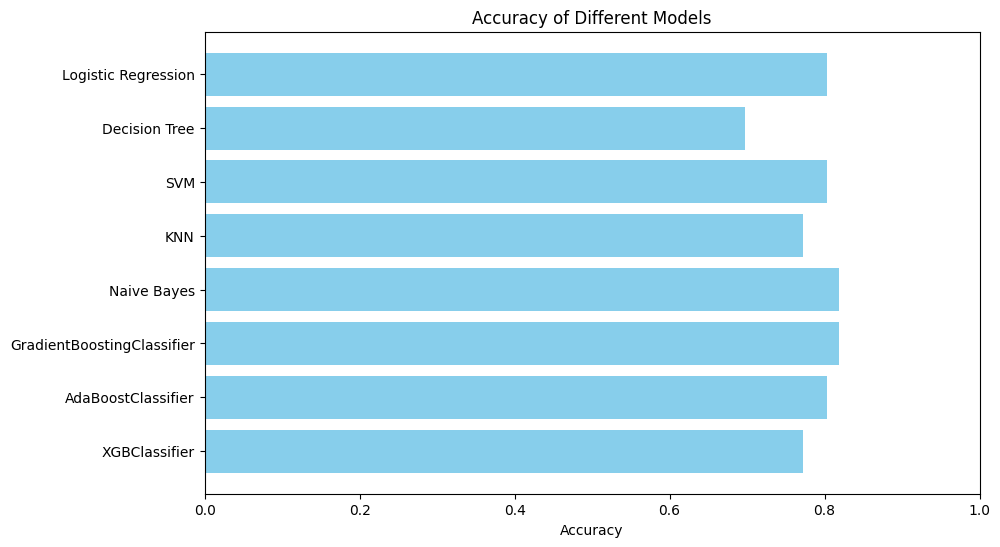

In [70]:
# Dictionary to store accuracies
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis() 
plt.show()

### Best Model evaluation

In [71]:
model = joblib.load('best_model_pro.pkl')
y_pred = model.predict(X_test)

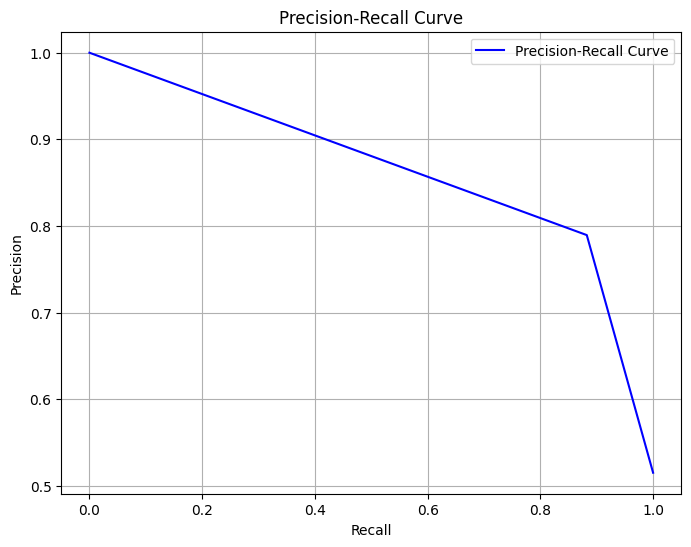

In [72]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_prob are defined
# y_pred_prob contains the predicted probabilities of the positive class

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Based on the Precision-Recall curve you've provided:

- The curve starts with high precision at low recall levels, which is typically the case when the classification threshold is set very high. This means the model is very strict about what it labels as positive, hence the low false positive rate (high precision) but also a high false negative rate (low recall).

- As the threshold lowers, the model starts to label more instances as positive, which increases the recall but reduces precision due to the increase in false positives.

- The overall trend of the curve is smooth and downward, which is typical for such curves as they demonstrate the trade-off between precision and recall.

- The area under the curve (AUPRC) is an important metric in imbalanced datasets where the positive class is much less prevalent than the negative class. A higher AUPRC would indicate a better model.

- In practice, the ideal point on the curve depends on the business or clinical needs. For example, in a medical diagnosis scenario, missing a positive case (low recall) could be much worse than falsely identifying a case (lower precision).

- By comparing the Precision-Recall curves of different models, or looking at the AUPRC, one can choose the best model for their needs. Additionally, one might adjust the decision threshold of a model to prioritize precision or recall, depending on what is more critical for the task at hand.

If you are comparing models or adjusting thresholds, it's crucial to consider the context of the problem you're trying to solve and whether it is more important to ensure that the positive predictions are correct (precision) or that you capture as many positive cases as possible (recall).

In [73]:
import pandas as pd
from sklearn.model_selection import cross_val_score

# Assuming 'model' is defined and 'X', 'y' are your features and target

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Convert scores to DataFrame
scores_df = pd.DataFrame({'Cross-Validation Fold': range(1, 6),
                          'Cross-Validation Score': scores})

# Print the DataFrame
print(scores_df)

   Cross-Validation Fold  Cross-Validation Score
0                      1                0.818182
1                      2                0.848485
2                      3                0.818182
3                      4                0.772727
4                      5                0.818182


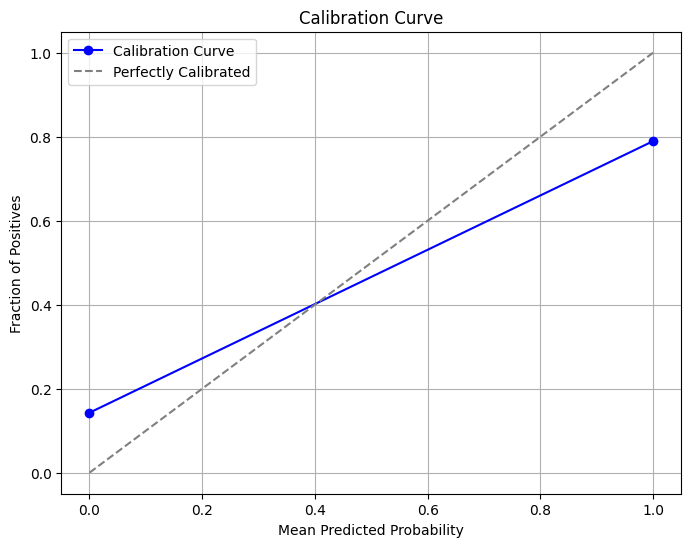

In [74]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Assuming y_true and y_pred_prob are defined
# y_pred_prob contains the predicted probabilities of the positive class

prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', color='b', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


The provided image appears to be a calibration curve, which is used to evaluate the calibration of probabilistic models. Here's how to interpret this curve:

- The **calibration curve** (in blue) represents the model's performance, showing the relationship between the mean predicted probability and the fraction of positives (true outcomes).

- The **diagonal dashed line** represents perfect calibration. If a model's calibration curve lies on this line, it means that the predicted probabilities match the observed probabilities. In other words, when the model predicts a probability p, exactly p percent of those predictions are correct.

- In your curve, we see that for lower predicted probabilities (near 0.0 to 0.2), the model underestimates the likelihood of a positive outcome since the fraction of positives is higher than the predicted probability.

- As the mean predicted probability increases, the model seems to become more calibrated, with the fraction of positives aligning more closely with the diagonal line. However, for the highest probabilities (near 1.0), the model overestimates the chances of a positive outcome.

- This calibration curve suggests that the model is fairly well-calibrated in the middle probabilities but could benefit from calibration techniques such as Platt scaling or isotonic regression for the extreme probabilities where it deviates from perfect calibration.

- Good calibration is critical in many applications, especially when the probabilities are used for decision-making, risk assessment, or when they are communicated to end-users who take actions based on these predictions.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  


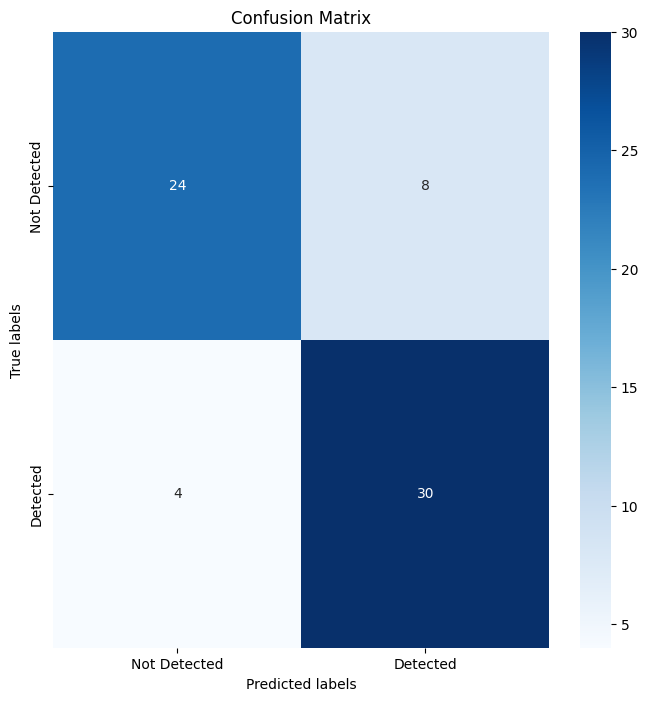

In [76]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)  
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Not Detected', 'Detected'])  
ax.yaxis.set_ticklabels(['Not Detected', 'Detected'])
plt.show()



Certainly, looking at the confusion matrix with the context of 'detected' and 'not detected' classes, here's what the numbers tell us:

- The model has **correctly identified 30 instances** as 'detected', which shows it has a good capacity to recognize positive cases.

- It has **correctly identified 27 instances as 'not detected'**, indicating it also reliably recognizes negative cases.

- There are **5 instances where the model predicted 'detected' but the true label was 'not detected'**. These are false alarms where the model incorrectly identified something as positive.

- There are **4 instances where the model predicted 'not detected' but the true label was 'detected'**. These are misses where the model failed to detect something it should have.

The confusion matrix shows that the model is more successful at detecting true positives than at avoiding false positives, but the difference is not very significant. Similarly, the number of misses (false negatives) is also quite low.

This model appears to have a good balance between detecting positives and avoiding false detections. However, the context of what is being detected is crucial for further interpretation. For example, if this is a medical test, those 4 misses might be quite significant, and efforts might be needed to reduce them even if it means increasing false positives slightly. If this is a spam filter, the 5 false positives might be an acceptable trade-off for having a lower number of false negatives.

**Conclusion**:
The data and models suggest that predicting heart attacks is complex and requires consideration of a range of factors, including age, chest pain type, and other cardiovascular metrics. Ensemble machine learning models, especially those boosting decision trees like XGBoost, AdaBoost, and Gradient Boosting, are quite effective in handling this complexity and making accurate predictions. However, the calibration curve and confusion matrix show that there is room for improvement, particularly in the model's confidence in its probability estimates and its ability to minimize false positives and negatives. 

It's also crucial to account for the age distribution of the dataset when evaluating the models, as model performance may vary across age groups. Furthermore, the variability of symptoms, such as different types of chest pain and their occurrence across age groups, adds complexity to the prediction task. The presence of asymptomatic heart attacks indicates the need for models to detect subtler patterns beyond obvious symptoms. 

Finally, the resting blood pressure and maximum heart rate charts provided contextual health data, which are important for understanding cardiovascular health but didn't show a strong linear relationship with age. The insights from these data visualizations could be used to refine the models further for better prediction accuracy.